### Virat Kohli Performance Analysis (Case Study)
    Virat Kohli is one of the most famous cricketers in the world. Here is a dataset of all the ODI matches played by Virat Kohli from 18 August 2008 to 22 January 2017. I'm going to analyze the performance of Virat Kohli in ODI matches.
    
    
    Below is the complete information about all the columns in the dataset:

    Runs: Runs in the match
    BF: Balls faced in the match
    4s: number of 4s in a match
    6s: number of 6s in a match
    SR: Strike Rate in the match
    Pos: Batting Position in the match
    Dismissal: How Virat Kohli got out in the match
    Inns: 1st and 2nd innings
    Opposition: Who was the opponent of India
    Ground: Venue of the match
    Start Date: Date of the match

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
data = pd.read_csv("C:/Users/singh/Documents/virat_kohli/Virat kohli.txt")
print(data.head())

   Runs  BF  4s  6s     SR  Pos Dismissal  Inns   Opposition         Ground  \
0    12  22   1   0  54.54  2.0       lbw     1  v Sri Lanka       Dambulla   
1    37  67   6   0  55.22  2.0    caught     2  v Sri Lanka       Dambulla   
2    25  38   4   0  65.78  1.0   run out     1  v Sri Lanka  Colombo (RPS)   
3    54  66   7   0  81.81  1.0    bowled     1  v Sri Lanka  Colombo (RPS)   
4    31  46   3   1  67.39  1.0       lbw     2  v Sri Lanka  Colombo (RPS)   

  Start Date  
0  18-Aug-08  
1  20-Aug-08  
2  24-Aug-08  
3  27-Aug-08  
4  29-Aug-08  


#### lets check there is any null values are present in our data set or not.

In [2]:
print(data.isnull().sum())

Runs          0
BF            0
4s            0
6s            0
SR            0
Pos           0
Dismissal     0
Inns          0
Opposition    0
Ground        0
Start Date    0
dtype: int64


In [3]:
# total run by virat kohli in ODI from 2008 to 2017

data["Runs"].sum()

6184

In [4]:
# lets look at average for same time periot in ODI.
# we can find out average by mean module.

data["Runs"].mean()

46.84848484848485

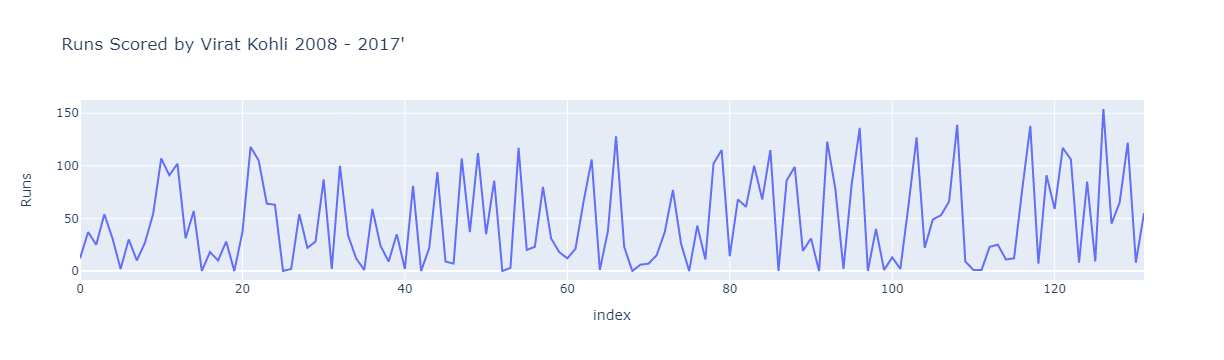

In [22]:
# Now let’s have a look at the trend of runs scored by Virat Kohli in his career from 2008 to 2017.
matches = data.index
figure = px.line(data, x=matches, y="Runs", title="Runs Scored by Virat Kohli 2008 - 2017'")
figure.show()

#### In so many innings played by Virat Kohli, he scored over 100 or close to it. That is a good sign of consistency
#### Now let’s see all the batting positions played by Virat Kohli:

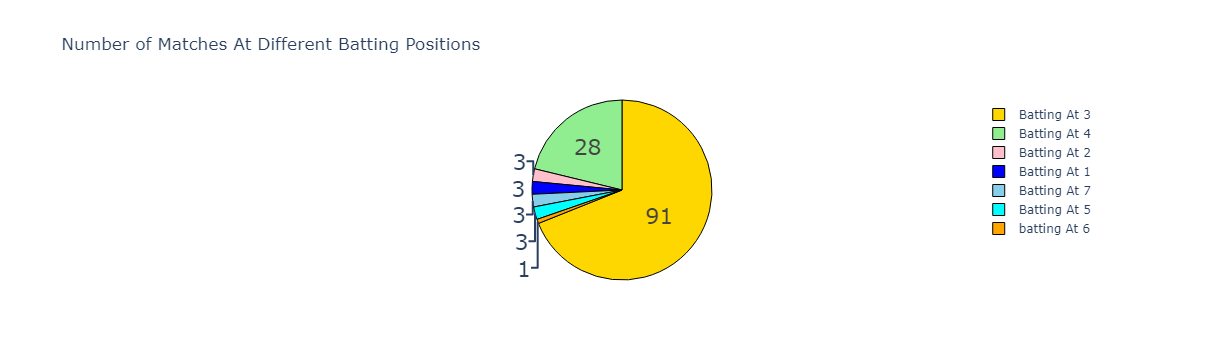

In [6]:
# Batting Positions
data["Pos"] = data["Pos"].map({1.0: "Batting At 1", 2.0: "Batting At 2", 3.0: "Batting At 3", 4.0: "Batting At 4", 5.0:"Batting At 5",
                               6.0: "batting At 6", 7.0:"Batting At 7"})

Pos = data["Pos"].value_counts()
label = Pos.index
counts = Pos.values
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "cyan", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Number of Matches At Different Batting Positions')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=22,
                  marker=dict(colors=colors, line=dict(color='black', width=1)))
fig.show()

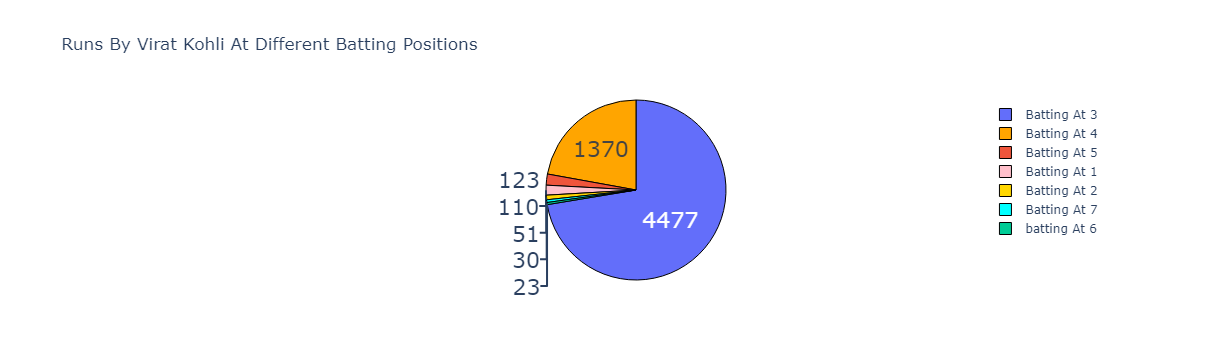

In [7]:
# Now let’s have a look at the total runs scored by Virat Kohli in different positions.
label = data["Pos"]
counts = data["Runs"]
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "cyan", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Runs By Virat Kohli At Different Batting Positions')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=22,
                  marker=dict(colors=colors, line=dict(color='black', width=1)))
fig.show()

#### More than 72% of the total runs scored by Virat Kohli are while batting at 3rd position. So we can say batting at 3rd position is perfect for Virat Kohli.
#### Now let’s have a look at the number of centuries scored by Virat Kohli while batting in the first innings and second innings:

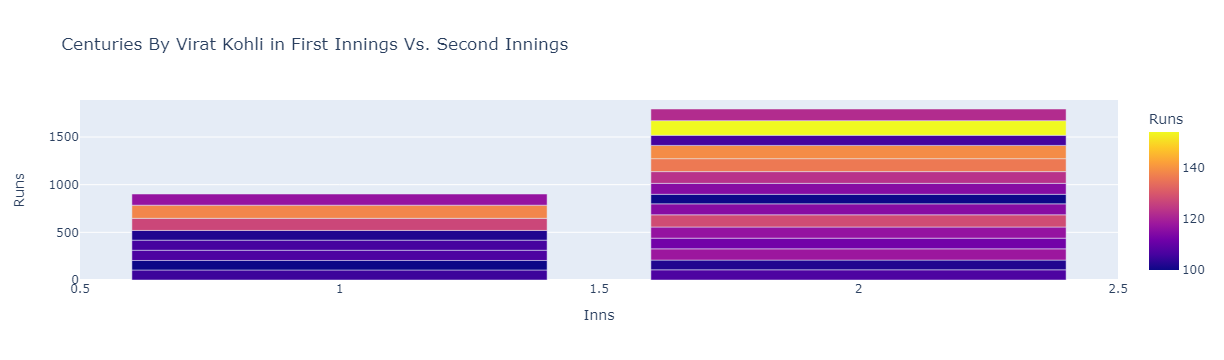

In [8]:
centuries = data.query("Runs >= 100")
figure = px.bar(centuries, x=centuries["Inns"], y = centuries["Runs"], 
                color = centuries["Runs"],
                title="Centuries By Virat Kohli in First Innings Vs. Second Innings")
figure.show()

#### So most of the centuries are scored while batting in the second innings. By this, we can say that Virat Kohli likes chasing scores.
#### Now let’s have a look at the kind of dismissals Virat Kohli faced most of the time:

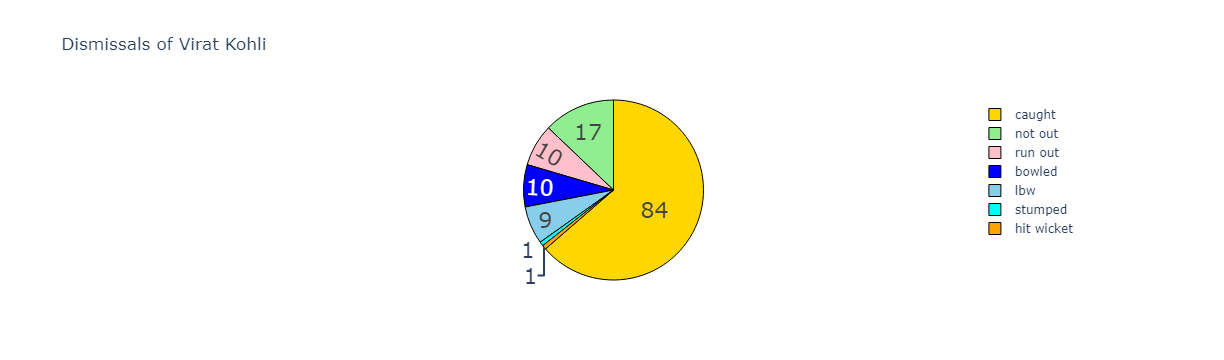

In [11]:
# Dismissals of Virat Kohli
dismissal = data["Dismissal"].value_counts()
label = dismissal.index
counts = dismissal.values
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "cyan", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Dismissals of Virat Kohli')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=22,
                  marker=dict(colors=colors, line=dict(color='black', width=1)))
fig.show()

#### So most of the time, Virat Kohli gets out by getting caught by the fielder or the keeper. 
#### Now let’s have a look at against which team Virat Kohli scored most of his runs:

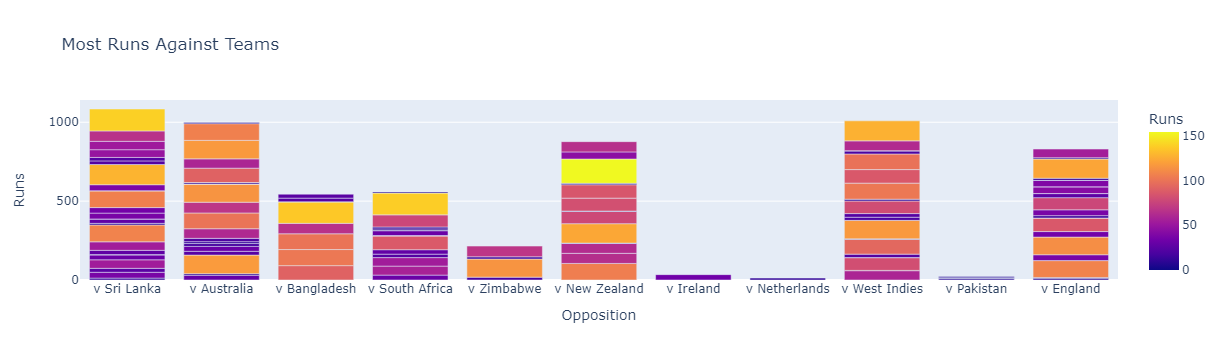

In [12]:
figure = px.bar(data, x=data["Opposition"], y = data["Runs"], color = data["Runs"],
            title="Most Runs Against Teams")
figure.show()

#### According to the above figure, Virat Kohli likes batting against Sri Lanka, Australia, New Zealand, West Indies, and England. 
#### But he scored most of his runs while batting against Sri Lanka.
#### Now let’s have a look at against which team Virat Kohli scored most of his centuries:

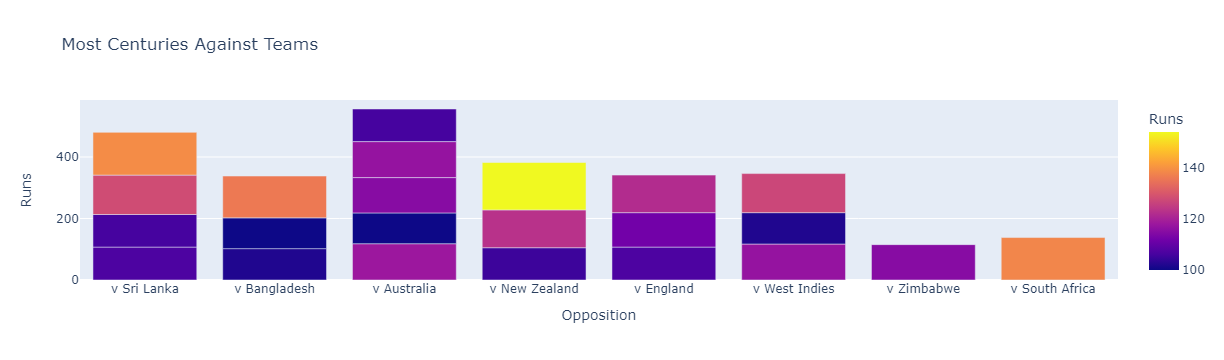

In [15]:
figure = px.bar(centuries, x=centuries["Opposition"], y = centuries["Runs"], 
                color = centuries["Runs"],
                title="Most Centuries Against Teams")
figure.show()

#### So, most of the centuries scored by Virat Kohli were against Australia. 
#### Now let’s analyze Virat Kohli’s strike rate. To analyze Virat Kohli’s strike rate,
#### I will create a new dataset of all the matches played by Virat Kohli where his strike rate was more than 120:

In [24]:
strike_rate = data.query("SR >= 120")
print(strike_rate)

     Runs  BF  4s  6s      SR           Pos Dismissal  Inns     Opposition  \
8      27  19   4   0  142.10  Batting At 7    bowled     1    v Sri Lanka   
32    100  83   8   2  120.48  Batting At 4   not out     1   v Bangladesh   
56     23  11   3   0  209.09  batting At 6   not out     1  v West Indies   
76     43  34   4   1  126.47  Batting At 3    caught     1      v England   
78    102  83  13   2  122.89  Batting At 3    caught     1  v West Indies   
83    100  52   8   7  192.30  Batting At 3   not out     2    v Australia   
85    115  66  18   1  174.24  Batting At 3   not out     2    v Australia   
93     78  65   7   2  120.00  Batting At 3    caught     2  v New Zealand   
130     8   5   2   0  160.00  Batting At 3    caught     1      v England   

            Ground Start Date  
8           Rajkot  15-Dec-09  
32           Dhaka  19-Feb-11  
56          Indore   8-Dec-11  
76      Birmingham  23-Jun-13  
78   Port of Spain   5-Jul-13  
83          Jaipur  16-Oct-

#### Now let’s see whether Virat Kohli plays with high strike rates in the first innings or second innings:

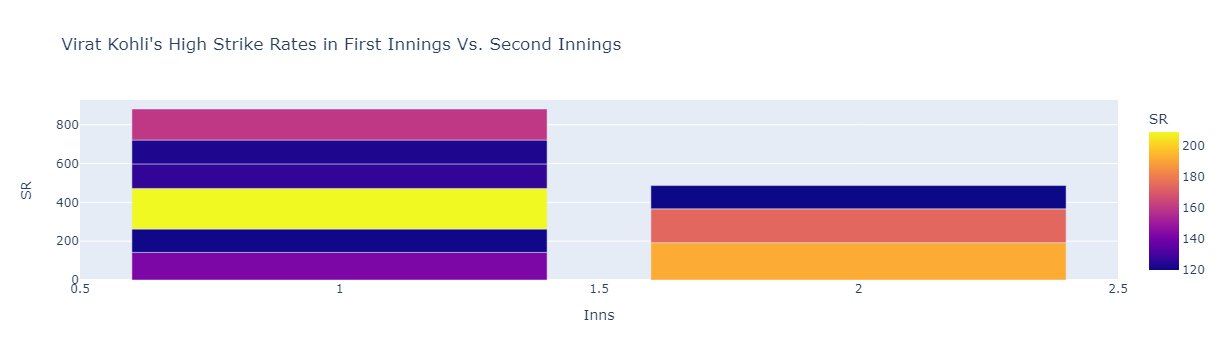

In [19]:
figure = px.bar(strike_rate, x = strike_rate["Inns"], 
                y = strike_rate["SR"], 
                color = strike_rate["SR"],
            title="Virat Kohli's High Strike Rates in First Innings Vs. Second Innings")
figure.show()

#### So according to the above figure, Virat Kohli likes playing more aggressively in the first innings compared to the second innings.
#### Now let’s see the relationship between runs scored by Virat Kohli and fours played by him in each innings:

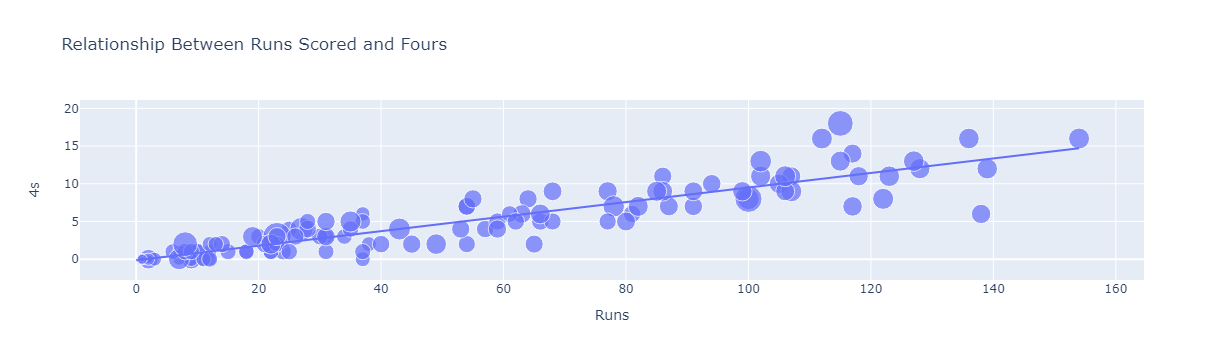

In [20]:
figure = px.scatter(data_frame = data, x="Runs",
                    y="4s", size="SR", trendline="ols", 
                    title="Relationship Between Runs Scored and Fours")
figure.show()

#### There is a linear relationship. It means that Virat Kohli likes playing fours.
#### The more runs he scores in the innings, the more fours he plays. 
#### Let’s see if there is some relationship with the sixes:


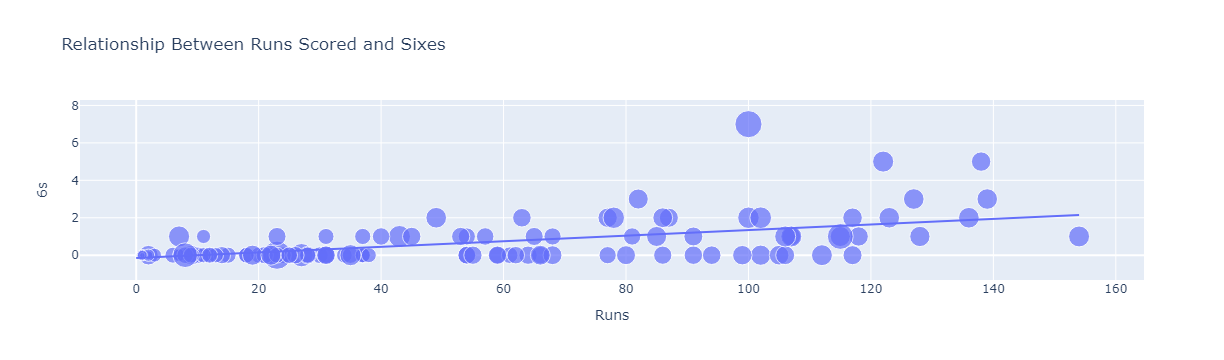

In [21]:
figure = px.scatter(data_frame = data, x="Runs",
                    y="6s", size="SR", trendline="ols", 
                    title= "Relationship Between Runs Scored and Sixes")
figure.show()

#### There is no strong linear relationship here. It means Virat Kohli likes playing fours more than sixes.  